In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [ ]:
class GradientDescent(object):
    def __init__(self, learning_rate=0.01, max_iter=1000, **kwargs):
        """
        [hyper_parameter]
        learning_rage: 학습률
        max_iter: 반복 최대치
        threshold:임계값
        
        kwargs: 재사용을 위해 선언만.
        """
        self._learning_rate = learning_rate
        self.W_ = None 
        self.max_iter = max_iter
        
    def fit(self, X_data, y_data):
        # 시각화 위함(우리의 공부를 위함)
        self.weight_list_ = []
        self.gradient_list_ = []
        
        # X = [[1], [2], [3], ...] : col 1, smaple = n개 
        
        num_sample, num_col = np.shape(X_data)
        
        # Beta(Theta) 추가
        # self.W_ = np.ones(num_col + 1) #Beta_n,... Beta1, Beta0
        # H(x) = W1 X + W0
        # H(x) = W1*X + 1*W0 위의 식과 같음 

        #상수항까지 추가하기 위해서 num_col+1  
        self.W_ = np.random.random(size=(num_col+1))
        
        X_data = np.c_[X_data, np.ones(num_sample)] #col하나 추가, col의 모든데이터는 1 
        X_data_T = X_data.T

        for i in range(self.max_iter):
            # 실제값과 예측값의 차이 (err)
            err = np.dot(X_data, self.W_) - y_data

            # err 이용하여 cost 생성 : 오차의 제곱합 / 2 * 데이터 개수
            # RMSE
            cost = np.sum(err ** 2) / (2 * num_sample)
            # 미분을 위해서 데이터 개수의 2배로 

            # transposed X * cost / n

            # cost함수: np.sum(wx-y)**2 > w 함수 > w에 대해서 편미분 
            #d(cost) / d(w)

            # np.sum[(wx-y)^2] 의 미분 
            # 2 (WX-y)X = 2(error)X/2*num = error * X / num

            # [[X1, X2, X3, ...]]
            # [1, 1, 1, ... ]
            #.dot()
  

            gradient = np.dot(X_data_T, err) / num_sample

            # Weight 업데이트
            self.W_ = self.W_ - (self._learning_rate * gradient)
            
            self.gradient_list_.append(gradient)
            self.weight_list_.append(self.W_)
            

        return self
    
    def predict(self, X_data):
        num_sample, num_col = np.shape(X_data)
        X_data = np.c_[X_data, np.ones(num_sample)]
        return np.dot(X_data, self.W_)
    
# w : 계수 >> coefficient
# intercept : y절편 

In [ ]:
#데이터 준비 
X = np.linspace(1, 30, 50)
y = X*3 + np.random.normal(size=(X.shape[0])) * 6
X = X.reshape(-1,1) #2차원데이터 만들기
X.shape

(50, 1)

In [ ]:
X

array([[ 1.        ],
       [ 1.59183673],
       [ 2.18367347],
       [ 2.7755102 ],
       [ 3.36734694],
       [ 3.95918367],
       [ 4.55102041],
       [ 5.14285714],
       [ 5.73469388],
       [ 6.32653061],
       [ 6.91836735],
       [ 7.51020408],
       [ 8.10204082],
       [ 8.69387755],
       [ 9.28571429],
       [ 9.87755102],
       [10.46938776],
       [11.06122449],
       [11.65306122],
       [12.24489796],
       [12.83673469],
       [13.42857143],
       [14.02040816],
       [14.6122449 ],
       [15.20408163],
       [15.79591837],
       [16.3877551 ],
       [16.97959184],
       [17.57142857],
       [18.16326531],
       [18.75510204],
       [19.34693878],
       [19.93877551],
       [20.53061224],
       [21.12244898],
       [21.71428571],
       [22.30612245],
       [22.89795918],
       [23.48979592],
       [24.08163265],
       [24.67346939],
       [25.26530612],
       [25.85714286],
       [26.44897959],
       [27.04081633],
       [27

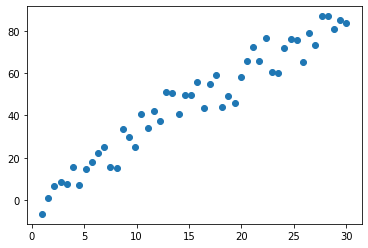

In [ ]:
plt.scatter(X.flatten(), y)

In [ ]:
gd = GradientDescent(max_iter = 100, learning_rate=0.001)
gd.fit(X, y)

In [ ]:
gd.predict(X)[:10], y[:10]

(array([ 3.15312473,  4.90278819,  6.65245164,  8.4021151 , 10.15177855,
        11.90144201, 13.65110547, 15.40076892, 17.15043238, 18.90009583]),
 array([-6.56656595,  1.17926007,  6.58248261,  8.60841417,  7.40164799,
        15.61465061,  7.24733865, 14.57429452, 17.92585542, 22.06622484]))

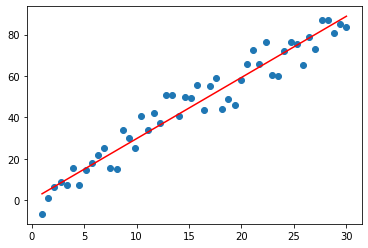

In [ ]:
plt.scatter(X,y)
plt.plot(X, gd.predict(X), 'r-')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the futur

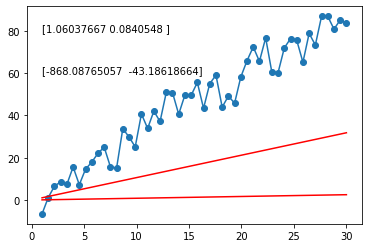

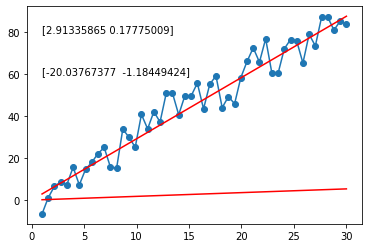

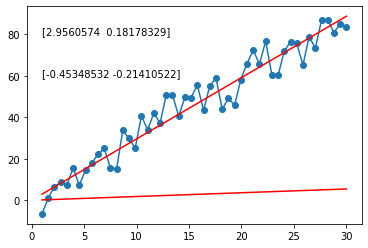

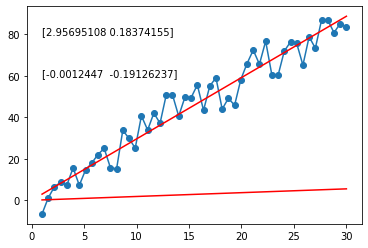

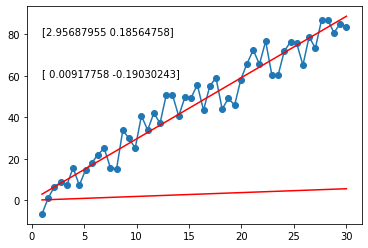

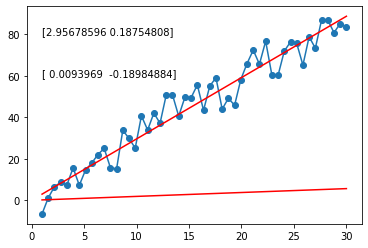

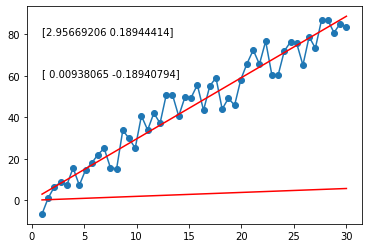

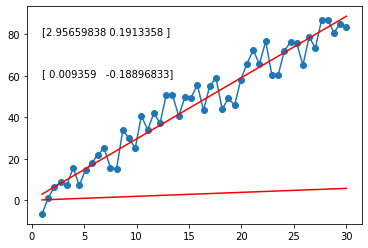

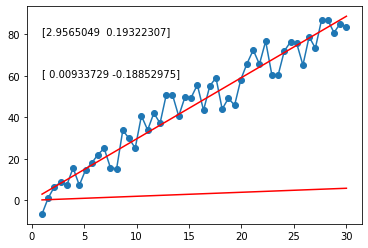

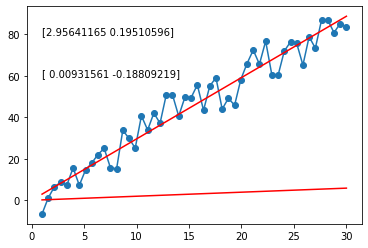

In [ ]:
import time
for W, G in zip(gd.weight_list_[::10], gd.gradient_list_[::10]):
  # plt.figure(figsize = (10, 10))
  plt.figure()
  plt.scatter(X, y)
  plt.plot(X, y)
  plt.plot(X, X.dot(W.reshape(X.shape[1], -1)), 'r-')
#x의 열에 맞춰서 벡터를 reshape

  plt.text(1, 80, W)
  plt.text(1, 60, G)
  # time.sleep(1)
